In [61]:
import pandas as pd
import eurostat

In [62]:
df = eurostat.get_data_df(code="HBS_STR_T226")
df = df.rename(columns={'geo\TIME_PERIOD': 'geo', '2015':'OBS_VALUE'})


In [63]:
unique_values_df1 = df["geo"].unique()

In [64]:
# Keep only the rows where TIME_PERIOD is equal to 2015
df = df.loc[:, ['deg_urb','coicop','geo','OBS_VALUE']]


In [65]:
df_inflation = eurostat.get_data_df(code="PRC_HICP_MANR",filter_pars={'startPeriod':"2021-03"})
df_inflation = df_inflation.rename(columns={'geo\TIME_PERIOD': 'geo'})


In [66]:
merged_df = df.merge(df_inflation, on=["coicop", "geo"])


In [67]:
merged_df.columns

Index(['deg_urb', 'coicop', 'geo', 'OBS_VALUE', 'freq', 'unit', '2021-03',
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04'],
      dtype='object')

In [68]:
cols_to_multiply = [col for col in merged_df.columns if col.startswith('202')]
merged_df[['w' + col for col in cols_to_multiply]] = merged_df[cols_to_multiply].apply(lambda x: x * merged_df['OBS_VALUE']/1000)


In [69]:
merged_df_5_chars = merged_df[merged_df['coicop'].str.len() == 5]


In [70]:
columns_to_sum = [col for col in merged_df_5_chars.columns if col.startswith('w')]
                  
summed_columns = []
for col in columns_to_sum:
    new_col_name = col[1:]
    summed_columns.append(new_col_name)
    merged_df_5_chars[new_col_name] = merged_df_5_chars.groupby(['geo', 'deg_urb'])[col].transform('sum')

df_inflation_by_deg_urb = merged_df_5_chars[['geo', 'deg_urb'] + summed_columns].drop_duplicates()

C:\Users\maxen\AppData\Local\Temp\ipykernel_8760\3751479068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_5_chars[new_col_name] = merged_df_5_chars.groupby(['geo', 'deg_urb'])[col].transform('sum')
C:\Users\maxen\AppData\Local\Temp\ipykernel_8760\3751479068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_5_chars[new_col_name] = merged_df_5_chars.groupby(['geo', 'deg_urb'])[col].transform('sum')
C:\Users\maxen\AppData\Local\Temp\ipykernel_8760\3751479068.py:7: SettingWithCopyWar

In [71]:
# we drop Italy and EA because they don't have the values, and TR because they have a crazy high inflation
df_inflation_by_deg_urb = df_inflation_by_deg_urb.loc[~df_inflation_by_deg_urb['geo'].isin(['IT', 'EA', 'TR', 'MK','ME', 'MT', 'RS'])]

In [72]:
df_inflation_by_deg_urb_2022_03 = df_inflation_by_deg_urb[["geo","deg_urb","2022-03"]]

In [73]:
df_inflation_by_deg_urb_2022_03 = df_inflation_by_deg_urb_2022_03.pivot(index="geo",columns="deg_urb",values="2022-03")

In [74]:
country_names = {
    'AT': 'Austria',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CY': 'Cyprus',
    'CZ': 'Czechia',
    'DE': 'Germany',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'EL': 'Greece',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SE': 'Sweden',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'ME': 'Montenegro',
    'MK': 'North Macedonia',
    'RS': 'Serbia',
    'XK': 'Kosovo',
    'EU27_2020' : 'European Union'
}
df_inflation_by_deg_urb_2022_03 = df_inflation_by_deg_urb_2022_03.rename(index=country_names)

In [75]:
df_inflation_by_deg_urb_2022_03.sort_values('DEG1')

deg_urb,DEG1,DEG2,DEG3,UNK
geo,,,,
France,3.4247,3.8196,4.0944,0.0
Norway,3.6387,4.3492,4.9752,NaN
Sweden,3.6946,4.3980,4.9355,NaN
Finland,3.8655,4.6128,5.2338,NaN
Portugal,4.5254,4.8421,5.0869,NaN
Slovenia,5.0099,5.6104,5.6563,NaN
Luxembourg,5.2897,5.4967,5.9602,0.0
Cyprus,5.4724,5.8165,6.0851,NaN
Denmark,5.7331,6.0244,6.4607,NaN


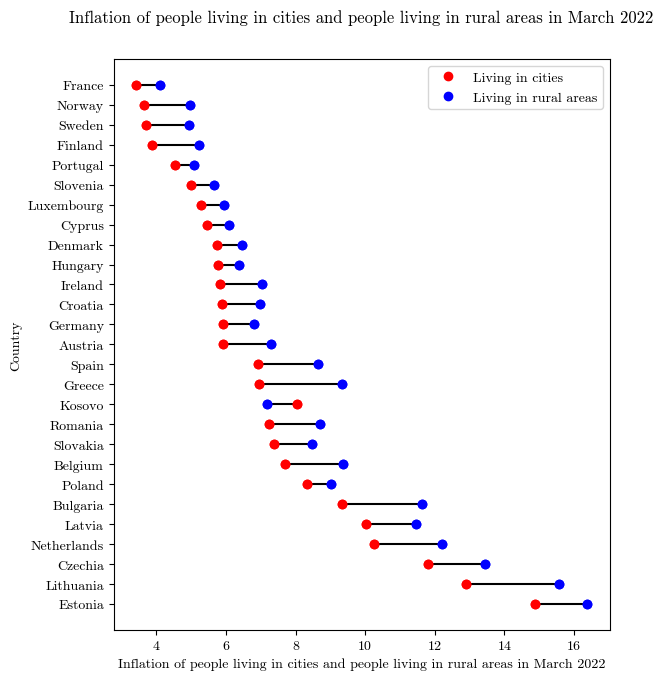

In [76]:
import matplotlib.pyplot as plt

df_inflation_by_deg_urb_2022_03['min'] = df_inflation_by_deg_urb_2022_03[['DEG1','DEG3']].min(axis=1)
df_inflation_by_deg_urb_2022_03 = df_inflation_by_deg_urb_2022_03.sort_values('min', ascending=False)
# Split the data into groups based on the "geo" column
groups = df_inflation_by_deg_urb_2022_03.groupby('geo', sort=False)
# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Create a flag for the first group
first_group = True

for name, group in groups:
    if first_group:
        # Plot the points for the first group with labels
        ax.plot([group['DEG1'], group['DEG3']], [name, name], '-', color='black')
        ax.plot([group['DEG1'], group['DEG1']], [name, name], 'o', color='red', label='Living in cities')
        ax.plot([group['DEG3'], group['DEG3']], [name, name], 'o', color='blue', label='Living in rural areas')
        
        # Set the flag to False so this block won't be executed again
        first_group = False
    else:
        # Plot the points for the other groups without labels
        ax.plot([group['DEG1'], group['DEG3']], [name, name], '-', color='black')
        ax.plot([group['DEG1'], group['DEG1']], [name, name], 'o', color='red')
        ax.plot([group['DEG3'], group['DEG3']], [name, name], 'o', color='blue')



# Add labels to the axes
ax.set_xlabel('Inflation of people living in cities and people living in rural areas in March 2022')
ax.set_ylabel('Country')

ax.legend()
# Adjust the spacing between the subplots
fig.subplots_adjust(top=1.3)

plt.title('Inflation of people living in cities and people living in rural areas in March 2022', y=1.05)

# Show the plot
plt.rcParams['font.family'] = 'cmr10'
plt.savefig(f'saved_figs/figure24-b.png', dpi=500, bbox_inches='tight')
plt.show()